<a href="https://colab.research.google.com/github/MLP-deepdreamteam/Practice_captioning/blob/branch_%EB%B0%B1%EC%9A%B4%EC%B2%A0/COCOImage30k_table_EDA_CHECK_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
#  gs://coco_custom30k/custom30k.zip

In [5]:
from zipfile import ZipFile

In [6]:
# !wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip # 전체롤드

In [14]:
! gsutil cp gs://coco_custom30k/custom30k.zip /content/coco_custom30k

Copying gs://coco_custom30k/custom30k.zip...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

| [1 files][  4.6 GiB/  4.6 GiB]   19.8 MiB/s                                   
Operation completed over 1 objects/4.6 GiB.                                      


In [15]:
with ZipFile("/content/coco_custom30k") as zfile:
  zfile.extractall(".")

In [16]:
# with GFile("gs://coco_custom30k/custom30k.zipl", "rb") as f:
#     dataset = pickle.load(f)

In [17]:
import pandas as pd
import json
# i = 0
# with open(f'/content/drive/MyDrive/coco_ann2017/annotations/captions_train2017.json', 'r') as f: # 마운트 확인
with open(f'/content/drive/MyDrive/coco_dataset/coco_ann2017/annotations/captions_train2017.json', 'r') as f: # 마운트 확인

    data = json.load(f)
    data = data['annotations']

img_cap_pairs = []

for sample in data:
    img_name = '%012d.jpg' % sample['image_id']
    img_cap_pairs.append([img_name, sample['caption'],sample['image_id']])

captions = pd.DataFrame(img_cap_pairs, columns=['image', 'caption','image_id'])
captions['image'] = captions['image'].apply(
    lambda x: f'/content/drive/MyDrive/coco_dataset//train2017/{x}'
)
captions = captions.reset_index(drop=True)
print(captions.head())



                                               image  \
0  /content/drive/MyDrive/coco_dataset//train2017...   
1  /content/drive/MyDrive/coco_dataset//train2017...   
2  /content/drive/MyDrive/coco_dataset//train2017...   
3  /content/drive/MyDrive/coco_dataset//train2017...   
4  /content/drive/MyDrive/coco_dataset//train2017...   

                                             caption  image_id  
0  A bicycle replica with a clock as the front wh...    203564  
1  A room with blue walls and a white sink and door.    322141  
2  A car that seems to be parked illegally behind...     16977  
3  A large passenger airplane flying through the ...    106140  
4  There is a GOL plane taking off in a partly cl...    106140  


In [18]:
df_captions_in_COCO = captions.groupby(["image", "image_id"])['caption'].apply(list).reset_index()


df_captions_in_COCO.shape


# # display(df_captions_in_COCO)

## sample 30k 생성용 
# # caption 길이가 5 이상이면 drop
# df_captions_in_COCO = df_captions_in_COCO[df_captions_in_COCO['caption'].apply(len) < 6]

# sample_30k  = df_captions_in_COCO.sample(30_000)




(118287, 3)

In [19]:
# df to dict


mypath_dict = {row['image']: row['caption'] for _, row in df_captions_in_COCO.iterrows()}

# Or, use the 'image_id' column as the key
myid_dict = {row['image_id']: row['caption'] for _, row in df_captions_in_COCO.iterrows()}

In [20]:
import os
sample_path ="/content/content/custom_train_coco_30k"
sample_train = os.listdir(sample_path)

# print(sample_train[:3])

In [21]:


my_sample_path = []
my_image_id= []

for jpg_file in sample_train:
    my_sample_path.append(sample_path+"/" +jpg_file)


    # exctract id in sample
    image_id = int(jpg_file.split('.')[0])
    my_image_id.append(image_id)

print(my_sample_path[:2],"\n", len(my_sample_path))
print()
print(my_image_id[:3], len(my_image_id))



['/content/content/custom_train_coco_30k/000000530999.jpg', '/content/content/custom_train_coco_30k/000000262093.jpg'] 
 30000

[530999, 262093, 168812] 30000


In [22]:
# Function to check if the image ID is in the my_image_id list
def keep_id(image_id):
    return image_id in my_image_id

# Create a custom dictionary with only the partial image IDs
my_custom_train_set = {k: v for k, v in myid_dict.items() if keep_id(k)}

In [23]:
updated_dict = {}
for k, v in my_custom_train_set.items():
    
    new_key = sample_path+"/{:012d}.jpg".format(k)
    updated_dict[new_key] = v


In [24]:
len(updated_dict)

30000

In [25]:
# 샘플 확인용

imgIdss= list(updated_dict.keys())
import random
random.shuffle(imgIdss)


A group of people sitting in a living room.
A green train is going alone the path of the tracks. 
a white and yellow bus and its driver
A white utility truck driving up against a gate.
A large black train on a train track. 
A young woman falls while surfing in the ocean.
A bed sitting in a bedroom next to a window under pictures.
A person is taking a picture of three people with a camera.
a half eaten meal sits on the table
A sidewalk outside of a winery with tables
A husky is lying under an elephant toy.
A coffee mug with beverage in it, a banana and one packaged food bar.


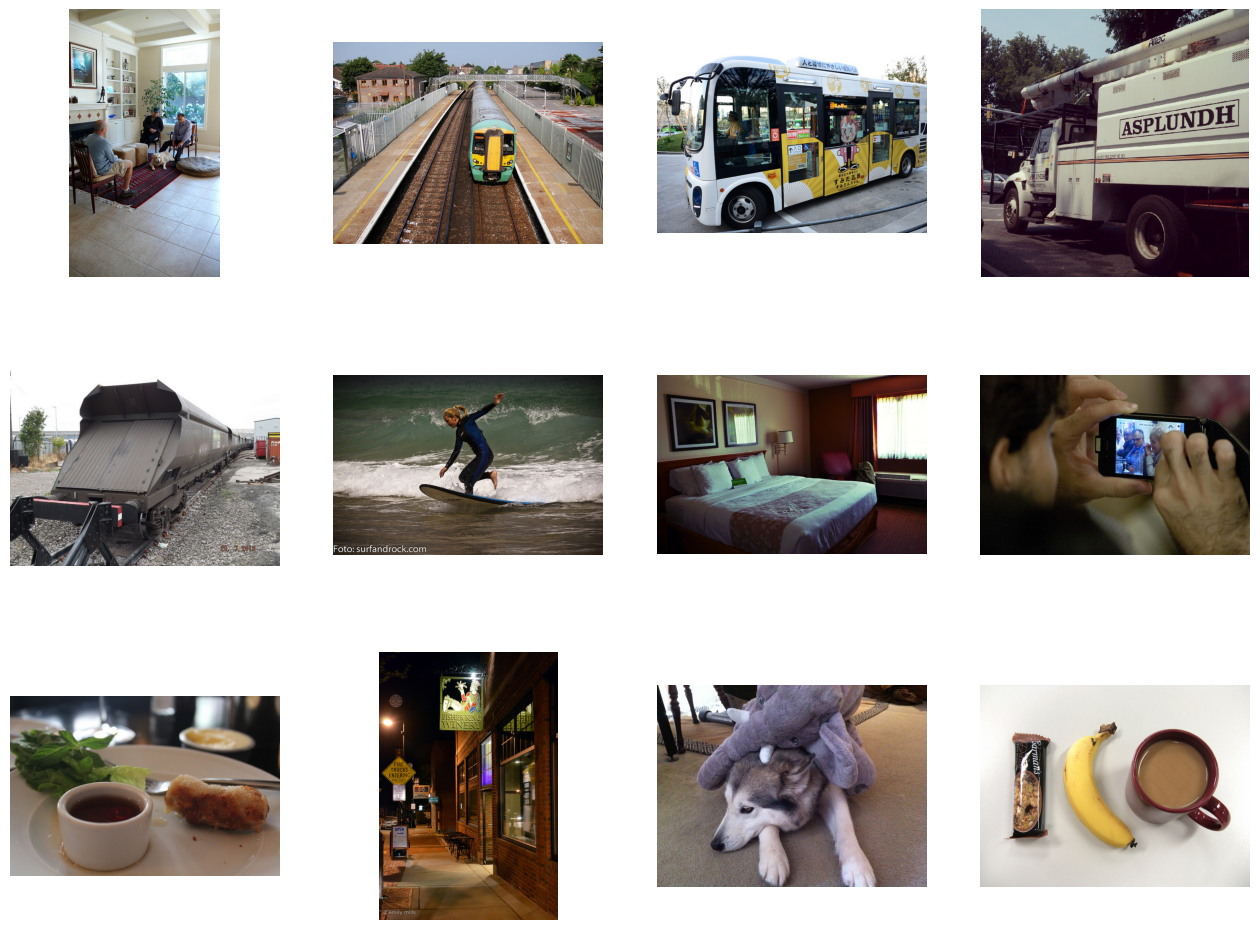

In [26]:
import matplotlib.pyplot as plt
import skimage.io as io

# 랜덤 파일 읽기, imgidss 확인!! -전체코코인지 일부인지
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix = imgIdss
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    I = io.imread(img_path)
    plt.imshow(I)
    print( updated_dict[img_path][0])

plt.show()

In [27]:
dataset =updated_dict


list(dataset.keys())[:10]
#여기까지!

['/content/content/custom_train_coco_30k/000000000025.jpg',
 '/content/content/custom_train_coco_30k/000000000081.jpg',
 '/content/content/custom_train_coco_30k/000000000089.jpg',
 '/content/content/custom_train_coco_30k/000000000092.jpg',
 '/content/content/custom_train_coco_30k/000000000151.jpg',
 '/content/content/custom_train_coco_30k/000000000154.jpg',
 '/content/content/custom_train_coco_30k/000000000165.jpg',
 '/content/content/custom_train_coco_30k/000000000208.jpg',
 '/content/content/custom_train_coco_30k/000000000250.jpg',
 '/content/content/custom_train_coco_30k/000000000294.jpg']

In [28]:
df = pd.DataFrame.from_dict(dataset, orient='index')
display(df)

,0,1,2,3,4
/content/content/custom_train_coco_30k/000000000025.jpg,A giraffe eating food from the top of the tree.,A giraffe standing up nearby a tree,A giraffe mother with its baby in the forest.,Two giraffes standing in a tree filled area.,A giraffe standing next to a forest filled wit...
/content/content/custom_train_coco_30k/000000000081.jpg,A big airplane flying in the big blue sky,"Large, two decked, four engined airliner in fl...",An AirFrance jet airplane flying in the sky,A big plane with AirFrance on the side of it.,An Air France air plane in mid flight.
/content/content/custom_train_coco_30k/000000000089.jpg,An oven with a stove on top of it in a kitchen.,A stove with a lighted hood in the kitchen.,A small light is on above the polished stove top.,Smooth top stove with exhaust fan that has lig...,A stove top is cleaned with a set of knives on...
/content/content/custom_train_coco_30k/000000000092.jpg,A white plate with a brownie and white frosting.,A piece of chocolate cake on top of a white pl...,a chocolate cake and a fork ready to be eat,A chocolate desert on a plate with a fork.,A piece of chocolate dessert on a plate with a...
/content/content/custom_train_coco_30k/000000000151.jpg,A stop sign directs pedestrians as a train tra...,A stop sign sits in the middle of the forest.,A stop sign sitting near some tall trees.,A man leans out of a vehicle near a short stop...,A stop sign is shown close to the ground.
...,...,...,...,...,...
/content/content/custom_train_coco_30k/000000581839.jpg,A group of people standing next to each other ...,An old photograph of three women in front of net.,Vintage photo of three women and a tennis court.,Three girls pose in front of a tennis net in a...,Three women who are posing together on a tenni...
/content/content/custom_train_coco_30k/000000581873.jpg,A large breed dog with black and brown fur is ...,A brown dog standing on a white and black tile...,The dog is standing on a black and white check...,a dog that is standing on a black and white floor,There is a huge brown and black dog standing a...
/content/content/custom_train_coco_30k/000000581884.jpg,A crowd of people flying kites on a sandy beach.,A group of people flying kites on the beach,Many colorful kites are flying high in the air.,A beach with various kites being flown while p...,Crowds of people flying kites over the desert.
/content/content/custom_train_coco_30k/000000581913.jpg,Four donuts in a box with a variety of frostings.,a close up of many different kinds of doughnuts,A group of donuts sitting in a box.,an image of a box of donuts in a box,A group of different types of doughnuts in a box.


In [29]:
df.columns = ['caption_1','caption_2','caption_3','caption_4','caption_5']
print(df.columns)

Index(['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5'], dtype='object')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, /content/content/custom_train_coco_30k/000000000025.jpg to /content/content/custom_train_coco_30k/000000581921.jpg
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   caption_1  30000 non-null  object
 1   caption_2  30000 non-null  object
 2   caption_3  30000 non-null  object
 3   caption_4  30000 non-null  object
 4   caption_5  30000 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [31]:
df=df.reset_index()

In [32]:
df

,index,caption_1,caption_2,caption_3,caption_4,caption_5
0,/content/content/custom_train_coco_30k/0000000...,A giraffe eating food from the top of the tree.,A giraffe standing up nearby a tree,A giraffe mother with its baby in the forest.,Two giraffes standing in a tree filled area.,A giraffe standing next to a forest filled wit...
1,/content/content/custom_train_coco_30k/0000000...,A big airplane flying in the big blue sky,"Large, two decked, four engined airliner in fl...",An AirFrance jet airplane flying in the sky,A big plane with AirFrance on the side of it.,An Air France air plane in mid flight.
2,/content/content/custom_train_coco_30k/0000000...,An oven with a stove on top of it in a kitchen.,A stove with a lighted hood in the kitchen.,A small light is on above the polished stove top.,Smooth top stove with exhaust fan that has lig...,A stove top is cleaned with a set of knives on...
3,/content/content/custom_train_coco_30k/0000000...,A white plate with a brownie and white frosting.,A piece of chocolate cake on top of a white pl...,a chocolate cake and a fork ready to be eat,A chocolate desert on a plate with a fork.,A piece of chocolate dessert on a plate with a...
4,/content/content/custom_train_coco_30k/0000000...,A stop sign directs pedestrians as a train tra...,A stop sign sits in the middle of the forest.,A stop sign sitting near some tall trees.,A man leans out of a vehicle near a short stop...,A stop sign is shown close to the ground.
...,...,...,...,...,...,...
29995,/content/content/custom_train_coco_30k/0000005...,A group of people standing next to each other ...,An old photograph of three women in front of net.,Vintage photo of three women and a tennis court.,Three girls pose in front of a tennis net in a...,Three women who are posing together on a tenni...
29996,/content/content/custom_train_coco_30k/0000005...,A large breed dog with black and brown fur is ...,A brown dog standing on a white and black tile...,The dog is standing on a black and white check...,a dog that is standing on a black and white floor,There is a huge brown and black dog standing a...
29997,/content/content/custom_train_coco_30k/0000005...,A crowd of people flying kites on a sandy beach.,A group of people flying kites on the beach,Many colorful kites are flying high in the air.,A beach with various kites being flown while p...,Crowds of people flying kites over the desert.
29998,/content/content/custom_train_coco_30k/0000005...,Four donuts in a box with a variety of frostings.,a close up of many different kinds of doughnuts,A group of donuts sitting in a box.,an image of a box of donuts in a box,A group of different types of doughnuts in a box.


In [33]:
 df.rename(columns={'index':'Img_address'}, inplace=True)
 df.head(5)

,Img_address,caption_1,caption_2,caption_3,caption_4,caption_5
0,/content/content/custom_train_coco_30k/0000000...,A giraffe eating food from the top of the tree.,A giraffe standing up nearby a tree,A giraffe mother with its baby in the forest.,Two giraffes standing in a tree filled area.,A giraffe standing next to a forest filled wit...
1,/content/content/custom_train_coco_30k/0000000...,A big airplane flying in the big blue sky,"Large, two decked, four engined airliner in fl...",An AirFrance jet airplane flying in the sky,A big plane with AirFrance on the side of it.,An Air France air plane in mid flight.
2,/content/content/custom_train_coco_30k/0000000...,An oven with a stove on top of it in a kitchen.,A stove with a lighted hood in the kitchen.,A small light is on above the polished stove top.,Smooth top stove with exhaust fan that has lig...,A stove top is cleaned with a set of knives on...
3,/content/content/custom_train_coco_30k/0000000...,A white plate with a brownie and white frosting.,A piece of chocolate cake on top of a white pl...,a chocolate cake and a fork ready to be eat,A chocolate desert on a plate with a fork.,A piece of chocolate dessert on a plate with a...
4,/content/content/custom_train_coco_30k/0000000...,A stop sign directs pedestrians as a train tra...,A stop sign sits in the middle of the forest.,A stop sign sitting near some tall trees.,A man leans out of a vehicle near a short stop...,A stop sign is shown close to the ground.


In [34]:
df["Img_address"].apply(lambda x : x[-16:-4])

0        000000000025
1        000000000081
2        000000000089
3        000000000092
4        000000000151
             ...     
29995    000000581839
29996    000000581873
29997    000000581884
29998    000000581913
29999    000000581921
Name: Img_address, Length: 30000, dtype: object

In [35]:
df['id_key']=df["Img_address"].apply(lambda x : x[-16:-4])
df.head(5)

,Img_address,caption_1,caption_2,caption_3,caption_4,caption_5,id_key
0,/content/content/custom_train_coco_30k/0000000...,A giraffe eating food from the top of the tree.,A giraffe standing up nearby a tree,A giraffe mother with its baby in the forest.,Two giraffes standing in a tree filled area.,A giraffe standing next to a forest filled wit...,000000000025
1,/content/content/custom_train_coco_30k/0000000...,A big airplane flying in the big blue sky,"Large, two decked, four engined airliner in fl...",An AirFrance jet airplane flying in the sky,A big plane with AirFrance on the side of it.,An Air France air plane in mid flight.,000000000081
2,/content/content/custom_train_coco_30k/0000000...,An oven with a stove on top of it in a kitchen.,A stove with a lighted hood in the kitchen.,A small light is on above the polished stove top.,Smooth top stove with exhaust fan that has lig...,A stove top is cleaned with a set of knives on...,000000000089
3,/content/content/custom_train_coco_30k/0000000...,A white plate with a brownie and white frosting.,A piece of chocolate cake on top of a white pl...,a chocolate cake and a fork ready to be eat,A chocolate desert on a plate with a fork.,A piece of chocolate dessert on a plate with a...,000000000092
4,/content/content/custom_train_coco_30k/0000000...,A stop sign directs pedestrians as a train tra...,A stop sign sits in the middle of the forest.,A stop sign sitting near some tall trees.,A man leans out of a vehicle near a short stop...,A stop sign is shown close to the ground.,000000000151


In [36]:
df.columns

Index(['Img_address', 'caption_1', 'caption_2', 'caption_3', 'caption_4',
       'caption_5', 'id_key'],
      dtype='object')

In [37]:
df = df[['id_key','Img_address', 'caption_1', 'caption_2', 'caption_3', 'caption_4',
       'caption_5']]

df.head(5)

,id_key,Img_address,caption_1,caption_2,caption_3,caption_4,caption_5
0,000000000025,/content/content/custom_train_coco_30k/0000000...,A giraffe eating food from the top of the tree.,A giraffe standing up nearby a tree,A giraffe mother with its baby in the forest.,Two giraffes standing in a tree filled area.,A giraffe standing next to a forest filled wit...
1,000000000081,/content/content/custom_train_coco_30k/0000000...,A big airplane flying in the big blue sky,"Large, two decked, four engined airliner in fl...",An AirFrance jet airplane flying in the sky,A big plane with AirFrance on the side of it.,An Air France air plane in mid flight.
2,000000000089,/content/content/custom_train_coco_30k/0000000...,An oven with a stove on top of it in a kitchen.,A stove with a lighted hood in the kitchen.,A small light is on above the polished stove top.,Smooth top stove with exhaust fan that has lig...,A stove top is cleaned with a set of knives on...
3,000000000092,/content/content/custom_train_coco_30k/0000000...,A white plate with a brownie and white frosting.,A piece of chocolate cake on top of a white pl...,a chocolate cake and a fork ready to be eat,A chocolate desert on a plate with a fork.,A piece of chocolate dessert on a plate with a...
4,000000000151,/content/content/custom_train_coco_30k/0000000...,A stop sign directs pedestrians as a train tra...,A stop sign sits in the middle of the forest.,A stop sign sitting near some tall trees.,A man leans out of a vehicle near a short stop...,A stop sign is shown close to the ground.


In [38]:
df['caption_list'] = df['caption_1']+' '+df['caption_2']+' '+df['caption_3']+' '+df['caption_4']+' '+df['caption_5']
df.iloc[0,-1]

<ipython-input-38-83bf1a13c9cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['caption_list'] = df['caption_1']+' '+df['caption_2']+' '+df['caption_3']+' '+df['caption_4']+' '+df['caption_5']


'A giraffe eating food from the top of the tree. A giraffe standing up nearby a tree  A giraffe mother with its baby in the forest. Two giraffes standing in a tree filled area. A giraffe standing next to a forest filled with trees.'

In [39]:
df.head(5)

,id_key,Img_address,caption_1,caption_2,caption_3,caption_4,caption_5,caption_list
0,000000000025,/content/content/custom_train_coco_30k/0000000...,A giraffe eating food from the top of the tree.,A giraffe standing up nearby a tree,A giraffe mother with its baby in the forest.,Two giraffes standing in a tree filled area.,A giraffe standing next to a forest filled wit...,A giraffe eating food from the top of the tree...
1,000000000081,/content/content/custom_train_coco_30k/0000000...,A big airplane flying in the big blue sky,"Large, two decked, four engined airliner in fl...",An AirFrance jet airplane flying in the sky,A big plane with AirFrance on the side of it.,An Air France air plane in mid flight.,A big airplane flying in the big blue sky Larg...
2,000000000089,/content/content/custom_train_coco_30k/0000000...,An oven with a stove on top of it in a kitchen.,A stove with a lighted hood in the kitchen.,A small light is on above the polished stove top.,Smooth top stove with exhaust fan that has lig...,A stove top is cleaned with a set of knives on...,An oven with a stove on top of it in a kitchen...
3,000000000092,/content/content/custom_train_coco_30k/0000000...,A white plate with a brownie and white frosting.,A piece of chocolate cake on top of a white pl...,a chocolate cake and a fork ready to be eat,A chocolate desert on a plate with a fork.,A piece of chocolate dessert on a plate with a...,A white plate with a brownie and white frostin...
4,000000000151,/content/content/custom_train_coco_30k/0000000...,A stop sign directs pedestrians as a train tra...,A stop sign sits in the middle of the forest.,A stop sign sitting near some tall trees.,A man leans out of a vehicle near a short stop...,A stop sign is shown close to the ground.,A stop sign directs pedestrians as a train tra...


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_key        30000 non-null  object
 1   Img_address   30000 non-null  object
 2   caption_1     30000 non-null  object
 3   caption_2     30000 non-null  object
 4   caption_3     30000 non-null  object
 5   caption_4     30000 non-null  object
 6   caption_5     30000 non-null  object
 7   caption_list  30000 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [ ]:
#coco39k_img_db

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [ ]:
from sqlalchemy import text

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/3조/DB/coco30k.db')


In [ ]:
df.to_sql('COCO30K_img', conn, if_exists='replace')

In [ ]:
# with engine.connect() as conn:
  #  conn.execute(text("SELECT id_key FROM COCO30K_img")).fetchall()

pd.read_sql('select * FROM COCO30K_img',conn)

In [ ]:
import sqlite3
import pandas as pd

# SQLite3 데이터베이스 파일에 연결
conn = sqlite3.connect('coco30k.db')

# 이미 존재하는 DataFrame
df4 = pd.DataFrame({'id': ['123'], 'name': ['hi']})

# DataFrame을 SQLite3 데이터베이스로 보내기
df4.to_sql('test', conn, if_exists='replace')

# SQLite3 데이터베이스 파일 닫기
conn.close()

In [ ]:
conn.close()

In [ ]:
a=[]

In [41]:
df_custom_input = pd.DataFrame(a, columns=['id_key','image_file'])

NameError: ignored

In [ ]:
df_custom_input

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

In [ ]:
max_lengths = df.applymap(lambda x: len(str(x))).max()

In [ ]:
print(max_lengths)

In [ ]:
max_lengths = df.applymap(lambda x: len(str(x))).idxmax()

In [ ]:
print(max_lengths)

In [ ]:
df.iloc[26529,2]

In [ ]:
df.iloc[25202,4]

In [ ]:
for i in range(1,6):
  df_cap_len = df[f'caption_{i}'].apply(len)>100
  print(df_cap_len.sum())
  df[f'caption_{i}'][df_cap_len]

In [47]:
df_test=df
for i in range(1, 6):
    df_test = df_test[df_test[f'caption_{i}'].apply(len) <= 100]

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28871 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_key        28871 non-null  object
 1   Img_address   28871 non-null  object
 2   caption_1     28871 non-null  object
 3   caption_2     28871 non-null  object
 4   caption_3     28871 non-null  object
 5   caption_4     28871 non-null  object
 6   caption_5     28871 non-null  object
 7   caption_list  28871 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


In [49]:
max_lengths = df_test.applymap(lambda x: len(str(x))).max()
max_lengths

id_key           12
Img_address      55
caption_1       100
caption_2       100
caption_3       100
caption_4       100
caption_5       100
caption_list    434
dtype: int64

In [50]:
df_test.describe()

,id_key,Img_address,caption_1,caption_2,caption_3,caption_4,caption_5,caption_list
count,28871,28871,28871,28871,28871,28871,28871,28871
unique,28871,28871,28336,28673,28712,28700,28699,28871
top,000000000025,/content/content/custom_train_coco_30k/0000000...,A man riding a wave on top of a surfboard.,A man riding a snowboard down a snow covered s...,A man holding a tennis racquet on a tennis court.,a person riding a skate board at a skate park,A man riding a wave on top of a surfboard.,A giraffe eating food from the top of the tree...
freq,1,1,20,8,6,7,5,1


In [85]:
df_test['caption_list']= df_test['caption_list'].apply(lambda x : x.lower())

In [86]:
df_test.describe()

,id_key,Img_address,caption_1,caption_2,caption_3,caption_4,caption_5,caption_list
count,28871,28871,28871,28871,28871,28871,28871,28871
unique,28871,28871,28336,28673,28712,28700,28699,28871
top,000000000025,/content/content/custom_train_coco_30k/0000000...,A man riding a wave on top of a surfboard.,A man riding a snowboard down a snow covered s...,A man holding a tennis racquet on a tennis court.,a person riding a skate board at a skate park,A man riding a wave on top of a surfboard.,a giraffe eating food from the top of the tree...
freq,1,1,20,8,6,7,5,1


In [89]:
df_test['caption_list'].str.contains('is sitting').sum()


1615

In [90]:
parse = df_test['caption_list'].str.contains('A man is sitting')

# df_test[parse
parse

# idx = df_test['caption_list'][parse].index


# df_test



0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: caption_list, Length: 28871, dtype: bool

In [95]:
df_test['caption_list'][df_test['caption_list'].str.contains('a man is sitting')].iloc[8]

'a black and white photo of a man on a bench a man sitting on a wooden bench by his self a man is sitting on a bench reading a newspaper. man with a bag sitting on a bench reading a magazine.  a man reading a paper on a bench.'

In [ ]:
df_test['caption_5'][df_test['caption_5'].str.contains('unable')]

2651       I am unable to see the image above.
3300       I am unable to see a picture above.
4765        I am unable to see an image above.
10373    I am unable to see any picture above.
12569      I am unable to see the image above.
14589      I am unable to see the image above.
19003      I am unable to see the image above.
22318      I am unable to see the image above.
Name: caption_5, dtype: object

In [ ]:
df_test_2 = df_test
for i in range(1, 6):
    df_test_2 = df_test_2[~df_test_2[f'caption_{i}'].str.contains('unable')]
    # ~df_test_2[f'caption_{i}'].str.contains('unable')

In [ ]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28846 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_key        28846 non-null  object
 1   Img_address   28846 non-null  object
 2   caption_1     28846 non-null  object
 3   caption_2     28846 non-null  object
 4   caption_3     28846 non-null  object
 5   caption_4     28846 non-null  object
 6   caption_5     28846 non-null  object
 7   caption_list  28846 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


In [ ]:
df_test[caption_5]

NameError: ignored

169


60       A bathroom with toilet, sink, window with curt...
257      On a baseball diamond, a player holds a bat wh...
383      A police officer riding a horse, and another p...
808      A group of professional baseball players playi...
927      A shot shows pale blue wall over a well-stuffe...
                               ...                        
29067    A kitchen with white cupboards, stainless stee...
29221    A room is furnished with a desk, chest of draw...
29571    A street sign on the edge of a curb has a sign...
29715    Two giraffes stand at the far end of a man-mad...
29848    A girl sitting at a table with a piece of pizz...
Name: caption_1, Length: 169, dtype: object

In [ ]:
print(len('/content/drive/Shareddrives/coco_dataset/destination_folder/train_folder01/000000048794.jpg'))

91


In [ ]:
from itertools import chain
from tensorflow.keras.preprocessing.text import Tokenizer

# 30K 단어 토큰화 # 15k만들기는 아직 보류

def tokenize_mycaption(dataset, max_words=15000):
  
  flatten_list = list(chain.from_iterable(dataset.values())) #[[1,3],[4,8]] = [1,3,4,8]

  tokenizer = Tokenizer( oov_token='<oov>') # For those words which are not found in word_index
  tokenizer.fit_on_texts(flatten_list)
  total_words = len(tokenizer.word_index) + 1
  print("Vocabulary length: ", total_words)
  print(list(tokenizer.word_index.keys())[:10])
  return tokenizer, total_words

tokenizer, total_words = tokenize_mycaption(dataset, max_words=15000)


Vocabulary length:  15691
['<oov>', 'a', 'on', 'of', 'the', 'in', 'with', 'and', 'is', 'man']


In [ ]:
# dataset 에 <start>, <end> 넣기, LSTM 용

newdataset = {k: ['<start> '   +cap+ ' <end>' for cap in caps] for k,caps in dataset.items()}

print(len(newdataset))
print(list(newdataset.items())[0])
print(len(list(newdataset.values())[0]))

dataset =newdataset


30000
('/content/content/custom_train_coco_30k/000000000025.jpg', ['<start> A giraffe eating food from the top of the tree. <end>', '<start> A giraffe standing up nearby a tree  <end>', '<start> A giraffe mother with its baby in the forest. <end>', '<start> Two giraffes standing in a tree filled area. <end>', '<start> A giraffe standing next to a forest filled with trees. <end>'])
5


In [ ]:
import itertools


# 임시 : sample은 개수

SAMPLE_NUM=10
testsample_dict= dict(itertools.islice(dataset.items(), SAMPLE_NUM))


# sample 쓴다고 가정
# dataset = testsample_dict

In [ ]:
# # 해당 3만개 데이터에 대한 tokenizer 저장  (15691 단어 수)

# import pickle

# # Save the configuration and weights to a file
# with open(f"my_tokenizer_{my_part}.pkl", "wb") as f:
#     pickle.dump({"tokenizer": tokenizer}, f)

(<keras.preprocessing.text.Tokenizer at 0x7f229c9f7d60>, 15691)

In [ ]:
# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    # featurewise_center=False,
    # samplewise_center=False,
    # featurewise_std_normalization=False,
    # samplewise_std_normalization=False,
    # zca_whitening=False,
    # zca_epsilon=1e-06,
    # rotation_range=0,
    width_shift_range=0.1, # changed
    height_shift_range=0.1, # changed
    # brightness_range=None,
    shear_range=0.1, # changed
    zoom_range=0.1, # changed
    # channel_shift_range=0.0,
    # fill_mode='nearest',
    # cval=0.0,
    horizontal_flip=True, # changed
    vertical_flip=False,
    # rescale=None,
    # preprocessing_function=None,
    # data_format=None,
    # validation_split=0.0,
    # interpolation_order=1,
    # dtype=None
)

In [ ]:
# Encoder 인 Xception 모델 호출, image_feature, imsize, error_imgs 선언, img_preprocess (이미지 사이즈 model 에 맞게 + resize, + 정규화 + feature 추출)


from tensorflow.keras.applications.xception import Xception
from tqdm.notebook import tqdm
import cv2
import numpy as np

model = Xception(include_top=False, pooling='avg',  weights='imagenet')

# model.compile()

image_features = {}

imsize = (299,299)
# dataset.keys()
error_imgs = []
# 윤성(230411/aug : True->False)
# def img_preprocess(dataset=dataset,imsize=imsize, model=model, aug =True  ):
def img_preprocess(dataset=dataset,imsize=imsize, model=model, aug =False  ):
    for img in tqdm(list(dataset.keys())):
        try:
            image = io.imread(img)
            if image.ndim != 3:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

            # Resize each image size 299 x 299 or 224 X 224
            image = cv2.resize(image, (imsize[1], imsize[0]))
            image = np.expand_dims(image, axis=0)
            if aug == True:
              augmented_image = data_gen.flow(image, batch_size=1).next()
              image = augmented_image

            # Normalize image pixels
            image = image / 127.5
            image = image - 1.0

            # Extract features from image
            feature = model.predict(image)
            image_features[img] = feature

        except:
            print(f"Failed to process image {img}")
            error_imgs.append[img]

In [ ]:
# MobileNet Feature extraction 용
from tensorflow.keras.layers import GlobalAveragePooling2D

IMAGE_SHAPE=(224, 224, 3)
mobilenet = tf.keras.applications.MobileNetV3Small(
    input_shape=IMAGE_SHAPE,
    include_top=False,
    include_preprocessing=True)
mobilenet.trainable=False

x = mobilenet.output
x = GlobalAveragePooling2D()(x)

modified_mobilenetv3small = Model(inputs=mobilenet.input, outputs=x)

# img_preprocess(dataset, imsize =IMAGE_SHAPE, model = modified_mobilenetv3small)


In [ ]:
# 윤성추가(230411)
# model_incep.summary()
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
# from tensorflow.keras.layers import GlobalAveragePooling2D

IMAGE_SHAPE=(224, 224, 3)

vgg16 = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
) 
vgg16.trainable=False

x = vgg16.output
x = GlobalAveragePooling2D()(x)

modified_vgg16 = Model(inputs=vgg16.input, outputs=x)

In [ ]:
#윤성추가(230411)
# modified_vgg16.summary()

img_preprocess(dataset, imsize =IMAGE_SHAPE, model = modified_vgg16)
# 뒤에 각모델마다  호출할때 모델 피팅 따로적용해야함

  0%|          | 0/30000 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 19ms/step


In [ ]:
print("Image features length: ", len(image_features))

Image features length:  30000


In [ ]:
# testsample_dict

# img_preprocess ( dataset = testsample_dict )


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 393ms/step


In [ ]:
print(len(image_features))
print(list(image_features.items())[-1])

30000
('/content/content/custom_train_coco_30k/000000581921.jpg', array([[3.12158227e-01, 0.00000000e+00, 2.66272724e-01, 2.59903483e-02,
        2.26716951e-01, 0.00000000e+00, 6.47689551e-02, 4.83099185e-02,
        0.00000000e+00, 3.68445255e-02, 9.38756485e-03, 5.50234318e-03,
        1.26338407e-01, 0.00000000e+00, 0.00000000e+00, 2.18454808e-01,
        5.15486300e-02, 8.63483548e-02, 2.54145265e-03, 5.69364987e-03,
        1.54284230e-02, 7.33500067e-03, 4.87746857e-03, 1.31795421e-01,
        3.57376263e-02, 0.00000000e+00, 2.35263780e-01, 1.91271186e-01,
        7.97985345e-02, 0.00000000e+00, 4.32602167e-01, 2.25734308e-01,
        2.81432241e-01, 6.52488098e-02, 2.35313121e-02, 1.51564938e-03,
        7.55980909e-02, 5.53009175e-02, 0.00000000e+00, 1.78930012e-03,
        1.50287512e-03, 1.49996951e-01, 2.28355646e-01, 5.33983447e-02,
        1.69695556e-01, 2.63666540e-01, 6.65479720e-01, 1.13315927e-02,
        3.18972766e-02, 4.19329554e-01, 1.25922427e-01, 1.25526441e-02

In [ ]:
# 윤성 07,08,09
import pickle
# Get the tokenizer's configuration and weights
# image_features

# 각자 Sampletrain 별로 저장하기 
# ex) train

# 윤성(230411/aug : True->False)
# with open(f"my_feature_{len(image_features)}_{my_part}.pkl", "wb") as f:
# with open(f"vgg16_feature_{len(image_features)}_aug_True.pkl", "wb") as f:
with open(f"vgg16_feature_{len(image_features)}_aug_False.pkl", "wb") as f:
    pickle.dump({"feature": image_features}, f)

In [ ]:
print(1)

1
